In [47]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
# Use 'read_csv' to injest dataset.
movies = pd.read_csv('./Datasets/IMDB_Dataset.csv')
movies.shape

(5043, 28)

We have a dataset with over 5000 moives each with 28 features. Lets take a closer look at the features.

In [49]:
movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

There are a lot of interesting features here, but to get started I want to take a closer look at the 'imdb_score' and 'gross' features.

Startin with 'imdb_score' well check if there are any null values, drop the null values, veiw the descriptive statistic and plot the distribution on a histogram.

In [54]:
# Check for null values
movies['imdb_score'].isnull().any()

False

In [55]:
# View the descriptive statistics
movies['imdb_score'].describe()

count    5043.000000
mean        6.442138
std         1.125116
min         1.600000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.500000
Name: imdb_score, dtype: float64

It appears that the moives are scored on a scale from 1 to 10, but no movie in this dataset has recieve the lowest score of 1 or a perfect score of 10. Lets plot this scores to get a better visulization of how the scores are distributed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D4372EC470>]],
      dtype=object)

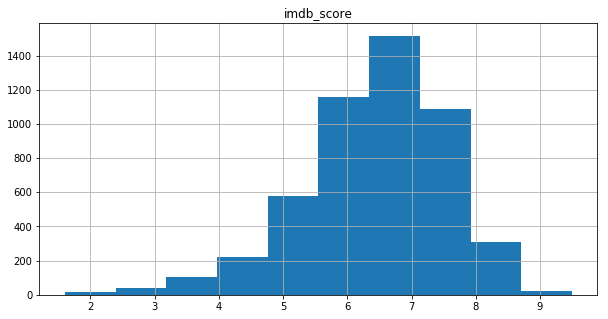

In [56]:
# Plot 
movies.hist(column='imdb_score', figsize=(10,5))

It looks like most movies are scored between 6 and 7. Not very many movie score an 8 or better.

Lets continue on with the 'gross' feature.

In [57]:
movies['gross'].isnull().any()

True

In [58]:
movies.dropna(inplace=True, subset=['gross'])

In [59]:
movies['gross'].describe()

count    4.159000e+03
mean     4.846841e+07
std      6.845299e+07
min      1.620000e+02
25%      5.340988e+06
50%      2.551750e+07
75%      6.230944e+07
max      7.605058e+08
Name: gross, dtype: float64

We have a min value of 162 and a max value of 760,505,800 with the average movie grossing 4,846,841.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D434559C50>]],
      dtype=object)

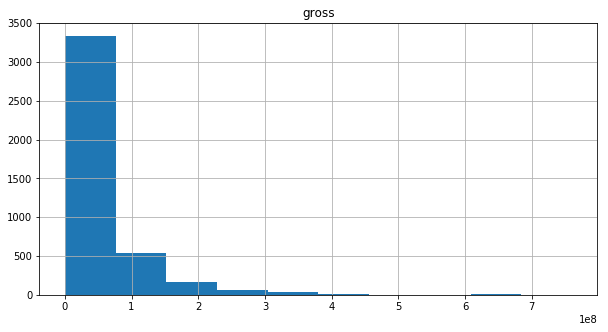

In [64]:
# Plot 
movies.hist(column='gross', figsize=(10,5))

We can see very few movies gross above $100,000. I wanna see if there are any movie genres that preform better at the box office and/or have better IMBD scores than others. We'll start by looking at the movie genres and selcting a few we want to analyze.